<center>
    <h1><b>K-Means: Idris Flower Prediction</b></h1>
    -------------------------
</center>

### Problem to solve

 - Use the iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
 - Figure out if any preprocessing such as scaling would help
 - Draw elbow plot and from that figure out optimal value of k

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pickle as pk

%matplotlib inline

**Loading The Dataset**

In [2]:
iris = load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
# Creatng dataframe from the iris dataset
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Exploration

In [6]:
# Dropping the unneeded columns
df1 = df.drop(columns = ['sepal length (cm)', 'sepal width (cm)'], axis = 1)

In [7]:
df1.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


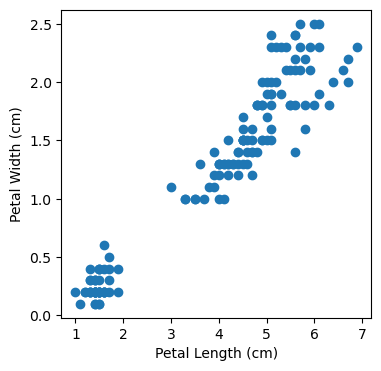

In [8]:
# Visualizing the dataset
plt.figure(figsize=[4,4])
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.scatter(x = df1['petal length (cm)'], y = df1['petal width (cm)']);

In [9]:
# Scaling the dataset
scaler = MinMaxScaler()

In [10]:
df_scaled = scaler.fit_transform(df1)

In [11]:
df_scaled[:5]

array([[0.06779661, 0.04166667],
       [0.06779661, 0.04166667],
       [0.05084746, 0.04166667],
       [0.08474576, 0.04166667],
       [0.06779661, 0.04166667]])

### Finding the Elbow Values

In [12]:
k_range = range(1, 13)
sse = []
for k in k_range:
    km = KMeans(n_clusters = k, n_init = 10)
    km.fit(df_scaled)
    sse.append(km.inertia_)

C:\Users\Banji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Banji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Banji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Banji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

In [13]:
# The Sum of Square Error
elbow_values = sse
elbow_values

[28.368353219727194,
 5.176463590044368,
 1.7018746881920963,
 1.1588792731667124,
 0.8538617353912238,
 0.6801035704886195,
 0.5651273455703979,
 0.4858084553914369,
 0.43712959331907786,
 0.3742177323020025,
 0.3395430444327582,
 0.30844697118099484]

### Visualizing the Elbow

C:\Users\Banji\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Banji\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


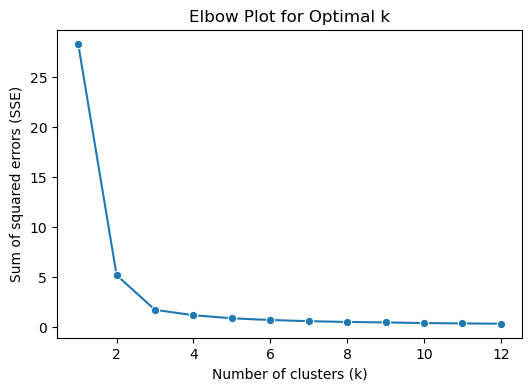

In [14]:
# Plot the elbow plot to determine the optimal k
plt.figure(figsize=(6, 4))
sb.lineplot(x=k_range, y=sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared errors (SSE)')
plt.title('Elbow Plot for Optimal k')
plt.show()

### Predicting clusters with K-Means

In [15]:
# The optimal number of clusters (k)
optimal_k = 3

In [16]:
kmeans = KMeans(n_clusters = optimal_k, n_init = 10, random_state = 0)
y_predicted = kmeans.fit_predict(df_scaled)
y_predicted

C:\Users\Banji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### Visualizing the Clusters

In [17]:
df_ = pd.DataFrame(df_scaled, columns = ['petal length (cm)', 'petal width (cm)'])

In [18]:
df_.head(2)

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667


In [19]:
df_['cluster'] = y_predicted

In [20]:
df_.head(2)

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,0
1,0.067797,0.041667,0


In [21]:
df_1 = df_[df_['cluster'] == 0]
df_2 = df_[df_['cluster'] == 1]
df_3 = df_[df_['cluster'] == 2]

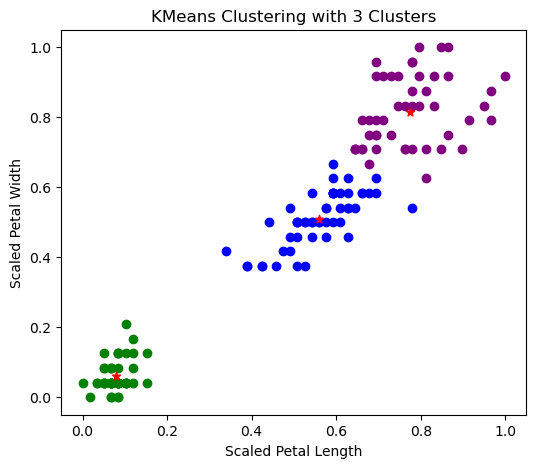

In [22]:
plt.figure(figsize=(6,5))
plt.scatter(df_1['petal length (cm)'], df_1['petal width (cm)'], color ='g', label='Setosa')
plt.scatter(df_2['petal length (cm)'], df_2['petal width (cm)'], color = 'purple', label='Versicolor')
plt.scatter(df_3['petal length (cm)'], df_3['petal width (cm)'], color = 'b', label='Virginica')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], color = 'red', marker = '*', label = 'centroid')
plt.xlabel('Scaled Petal Length')
plt.ylabel('Scaled Petal Width')
plt.title(f'KMeans Clustering with {optimal_k} Clusters');

#### Alternative Visuals

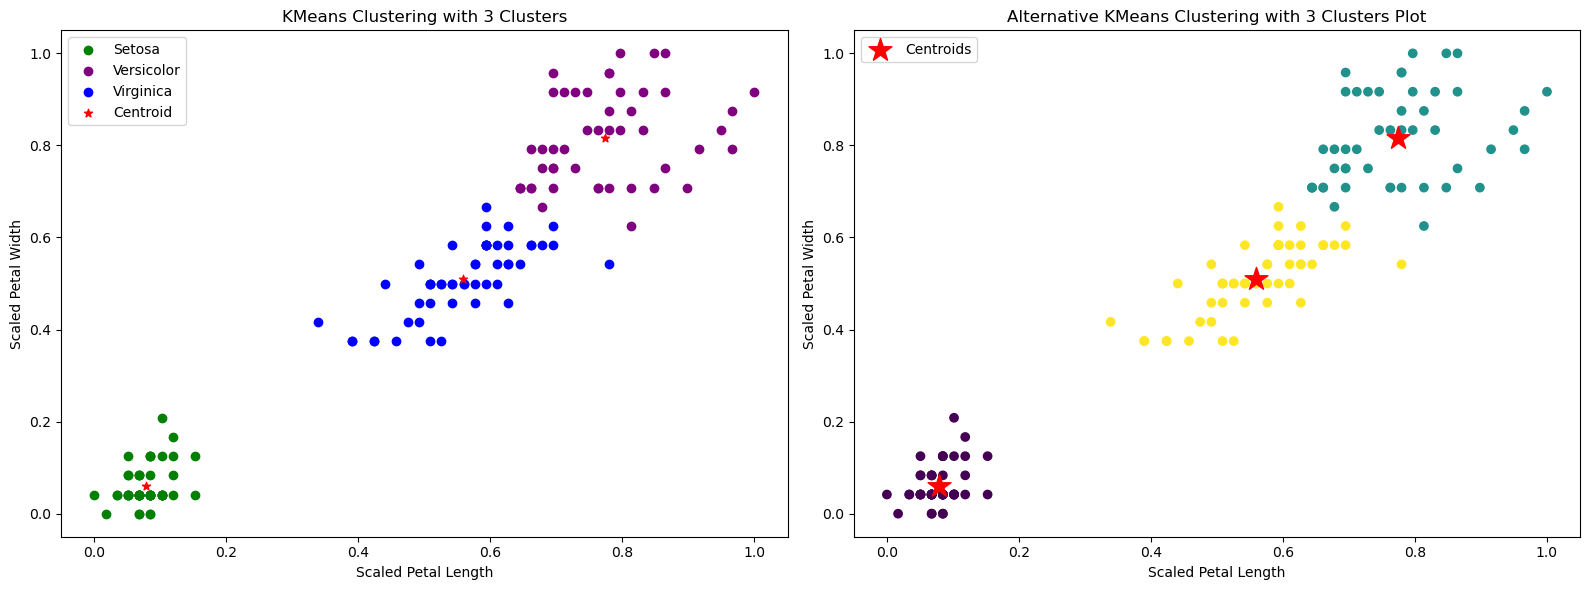

In [23]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# First subplot
axes[0].scatter(df_1['petal length (cm)'], df_1['petal width (cm)'], color='g', label='Setosa')
axes[0].scatter(df_2['petal length (cm)'], df_2['petal width (cm)'], color='purple', label='Versicolor')
axes[0].scatter(df_3['petal length (cm)'], df_3['petal width (cm)'], color='b', label='Virginica')
axes[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='*', label='Centroid')
axes[0].set_xlabel('Scaled Petal Length')
axes[0].set_ylabel('Scaled Petal Width')
axes[0].set_title(f'KMeans Clustering with {optimal_k} Clusters')
axes[0].legend()

# Second subplot
axes[1].scatter(df_scaled[:, 0], df_scaled[:, 1], c=y_predicted, cmap='viridis', marker='o')
axes[1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='*', label='Centroids')
axes[1].set_xlabel('Scaled Petal Length')
axes[1].set_ylabel('Scaled Petal Width')
axes[1].set_title(f'Alternative KMeans Clustering with {optimal_k} Clusters Plot')
axes[1].legend()

plt.tight_layout()
plt.show()


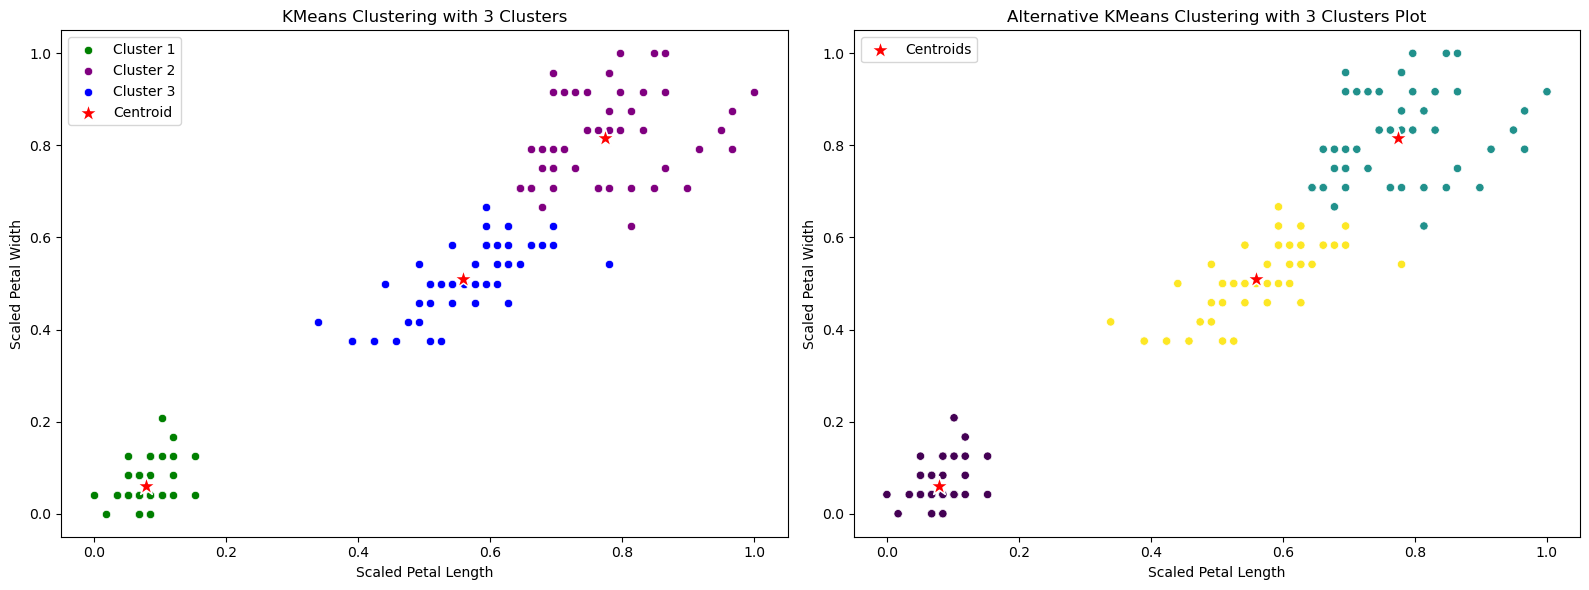

In [24]:
# Creating subplots with seaborn
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# First subplot
sb.scatterplot(ax=axes[0], x=df_1['petal length (cm)'], y=df_1['petal width (cm)'], color='g', label='Cluster 1')
sb.scatterplot(ax=axes[0], x=df_2['petal length (cm)'], y=df_2['petal width (cm)'], color='purple', label='Cluster 2')
sb.scatterplot(ax=axes[0], x=df_3['petal length (cm)'], y=df_3['petal width (cm)'], color='b', label='Cluster 3')
sb.scatterplot(ax=axes[0], x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color='red', marker='*', s=200, label='Centroid')
axes[0].set_xlabel('Scaled Petal Length')
axes[0].set_ylabel('Scaled Petal Width')
axes[0].set_title(f'KMeans Clustering with {optimal_k} Clusters')
axes[0].legend()

# Second subplot
sb.scatterplot(ax=axes[1], x=df_scaled[:, 0], y=df_scaled[:, 1], hue=y_predicted, palette='viridis', marker='o', legend=None)
sb.scatterplot(ax=axes[1], x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], s=200, color='red', marker='*', label='Centroids')
axes[1].set_xlabel('Scaled Petal Length')
axes[1].set_ylabel('Scaled Petal Width')
axes[1].set_title(f'Alternative KMeans Clustering with {optimal_k} Clusters Plot')
axes[1].legend()

plt.tight_layout()
plt.show()

### Saving the model

In [25]:
with open('model_iris_k-means', 'wb') as file:
    pk.dump(kmeans, file)

In [ ]:
"""
# Load the KMeans model from the pickle file
with open('kmeans_model.pkl', 'rb') as file:
    loaded_kmeans = pickle.load(file)

# Verify the loaded model
print(f"Loaded model's cluster centers:\n{loaded_kmeans.cluster_centers_}")

# Add the cluster predictions to the DataFrame
df_ = pd.DataFrame(df_scaled, columns=['petal length (cm)', 'petal width (cm)'])
df_['cluster'] = y_predicted
"""